In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [61]:
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [66]:
df.dropna(inplace= True)

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.shape

(480, 13)

In [69]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [71]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [72]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [73]:
df.iloc[0]

Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: 1, dtype: object

In [74]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female': 1})
df['Married'] = df['Married'].replace({'No':0, 'Yes': 1})
df['Education'] = df['Education'].replace({'Not Graduate':0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].replace({'No':0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].replace({'Rural':0, 'Urban':1, 'Semiurban':2})

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_7572\3453683536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':0, 'Female': 1})
C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_7572\3453683536.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Married'] = df['Married'].replace({'No':0, 'Yes': 1})
C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_7572\3453683536.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

In [75]:
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])
df['Dependents'] = le.fit_transform(df['Dependents'])

In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,4,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [77]:
X= df.iloc[:, 0:12]
Y = df.iloc[:,-1]

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2, random_state= 2)

In [79]:
rfc= RandomForestClassifier(n_estimators= 250, random_state= 2)
rfc.fit(xtrain,ytrain)
y_pred = rfc.predict(xtest)
y_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [83]:
y_predi = rfc.predict(np.array([[1, 0, 1, 0, 1, 1, 3000, 0.0, 66.0, 360.0, 1.0, 1]]))
y_predi

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Y'], dtype=object)

[Text(0.5504958877600387, 0.96875, 'x[5] <= 0.5\ngini = 0.402\nsamples = 245\nvalue = [107, 277]'),
 Text(0.2519351717464925, 0.90625, 'x[10] <= 0.5\ngini = 0.387\nsamples = 207\nvalue = [85.0, 239.0]'),
 Text(0.061925495887760036, 0.84375, 'x[8] <= 96.5\ngini = 0.264\nsamples = 23\nvalue = [27, 5]'),
 Text(0.030962747943880018, 0.78125, 'x[8] <= 76.5\ngini = 0.375\nsamples = 2\nvalue = [1, 3]'),
 Text(0.015481373971940009, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04644412191582003, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]'),
 Text(0.09288824383164006, 0.78125, 'x[6] <= 4658.5\ngini = 0.133\nsamples = 21\nvalue = [26, 2]'),
 Text(0.07740686985970005, 0.71875, 'gini = 0.0\nsamples = 15\nvalue = [20, 0]'),
 Text(0.10836961780358007, 0.71875, 'x[8] <= 141.0\ngini = 0.375\nsamples = 6\nvalue = [6, 2]'),
 Text(0.09288824383164006, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12385099177552007, 0.65625, 'x[0] <= 365.5\ngini = 0.245\nsamples = 5\nv

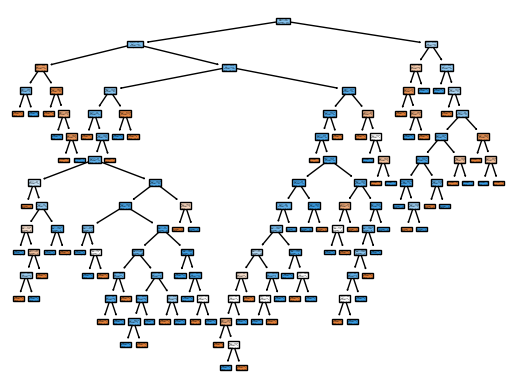

In [81]:
tree.plot_tree(rfc.estimators_[156], filled = True)

In [84]:
for i in range(len(rfc.estimators_)):
    tree.plot_tree(rfc.estimators_[i], filled = True)